# CVPR Project - Part 1: Descriptors (SIFT vs KAZE vs SURF)

## Multi Model Multi Template Fitting

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
from statistics import median
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [9]:
from utils import *

## Experiments

## AU LAIT ##

### SIFT

In [342]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

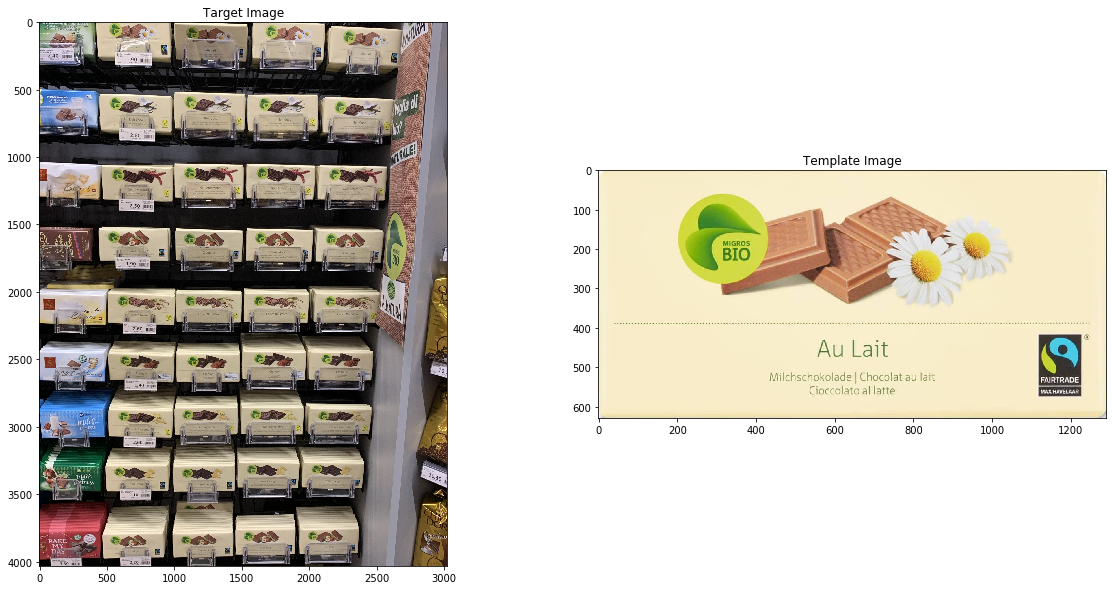

In [343]:
plot_images(img_target, img_template)

In [215]:
keypoints_target, descriptors_target, keypoints_template1, descriptors_template1 = sift_keypoints_and_descriptors(img_target, img_template)

In [216]:
plot_best_matches1, best_matches1 = get_best_matches(descriptors_target, descriptors_template1, ratio=0.45)

In [218]:
correspondences1 = get_correspondences(best_matches1, keypoints_target, keypoints_template1)

In [514]:
models1 = sequential_msac(correspondences1, 1, 4,99,2500, 0.8)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


174
163
152
144
136
128
121
114
108
102
96
91
86
80
74
70
66
62
58
54
50
46
41
37
33
29
25
21
17
13
9
6


In [517]:
PS = get_preference_sets(correspondences1, models1)

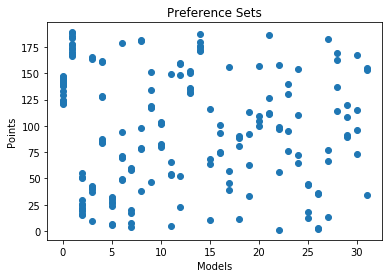

In [518]:
plot_scatter(PS)

In [267]:
cl = j_linkage(PS)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [268]:
mod = remove_pref_set(cl)

In [269]:
mod = get_model(cl,correspondences1)

In [270]:
new_mod = delete_small_model(mod, 4)

In [273]:
clusters_, clusters_size_list = define_clusters(new_mod)
clusters_size = len(clusters_)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list, clusters_)))

new_test_model = remove_far_distances_clusters(clusters_, new_mod,100)

print("Num of clusters previously: {}".format(len(new_mod)))

clusters_new, clusters_size_list_new = define_clusters(new_test_model)
clusters_new, new_test_model = merge_cluster(clusters_new, new_test_model)
clusters_new, clusters_size_list_new = define_clusters(new_test_model)

print("Num of clusters currently: {}".format(len(new_test_model)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new, clusters_new)))

Previous dunn index of the cluster : 0.001305499676295476
Num of clusters previously: 17
Num of clusters currently: 4
Current dunn index of the cluster : 0.014774830516816809


In [274]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

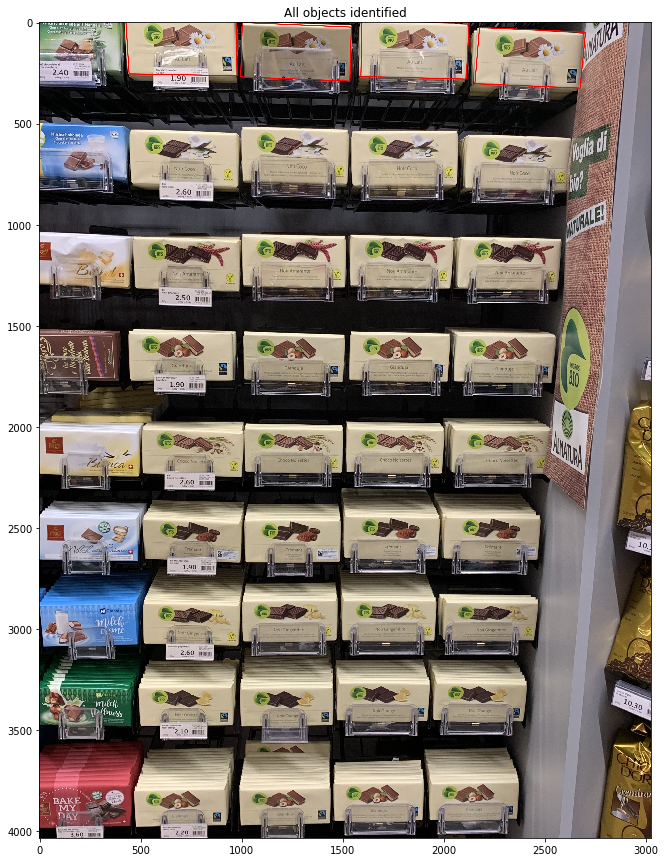

In [275]:
draw_bounding_boxes(img_target, img_template, new_test_model, 1, isPostJLinkage=True, color=(3, 3, 252))

### KAZE

#### Same parameters

In [47]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [48]:
keypoints_target_kaze, descriptors_target_kaze, keypoints_template1_kaze, descriptors_template1_kaze = kaze_keypoints_and_descriptors(img_target, img_template)

In [49]:
plot_best_matches1_kaze, best_matches1_kaze = get_best_matches(descriptors_target_kaze, descriptors_template1_kaze, ratio=0.45, method=cv.NORM_HAMMING)

In [50]:
correspondences1_kaze = get_correspondences(best_matches1_kaze, keypoints_target_kaze, keypoints_template1_kaze)

In [51]:
len(correspondences1_kaze)

38

In [52]:
models1_kaze = sequential_msac(correspondences1_kaze, 1, 4,99,2500, 5)

33
29
24
19
15
11
7
3


In [53]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

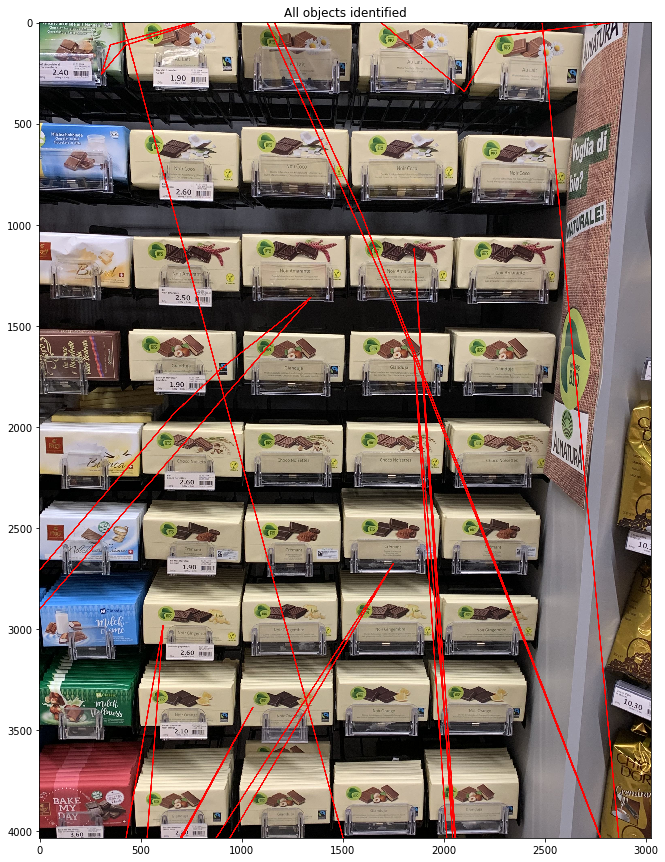

In [54]:
draw_bounding_boxes(img_target, img_template, models1_kaze, 1, isPostJLinkage=False, color=(3, 3, 252))

#### Tuned parameters

In [300]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [301]:
plot_best_matches2_kaze, best_matches2_kaze = get_best_matches(descriptors_target_kaze, descriptors_template1_kaze, ratio=0.65, method=cv.NORM_HAMMING)

In [303]:
correspondences2_kaze = get_correspondences(best_matches2_kaze, keypoints_target_kaze, keypoints_template1_kaze)

In [304]:
len(correspondences2_kaze)

187

In [307]:
models2_kaze = sequential_msac(correspondences2_kaze, 1, 4,99,2500, 1.5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


176
164
153
145


In [310]:
PS_kaze = get_preference_sets(correspondences2_kaze, models2_kaze)

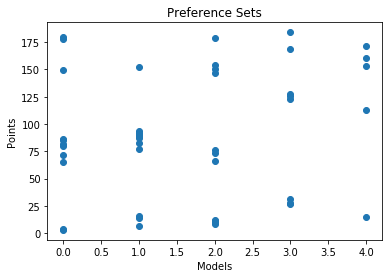

In [311]:
plot_scatter(PS_kaze)

In [312]:
cl_kaze = j_linkage(PS_kaze)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [314]:
mod_kaze = remove_pref_set(cl_kaze)
mod_kaze = get_model(cl_kaze,correspondences2_kaze)
new_mod_kaze = delete_small_model(mod_kaze, 4)

In [317]:
clusters_kaze, clusters_size_list_kaze = define_clusters(new_mod_kaze)
clusters_size_kaze = len(clusters_kaze)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list_kaze, clusters_kaze)))

new_test_model_kaze = remove_far_distances_clusters(clusters_kaze, new_mod_kaze,100)

print("Num of clusters previously: {}".format(len(new_mod_kaze)))

clusters_new_kaze, clusters_size_list_new_kaze = define_clusters(new_test_model_kaze)
clusters_new_kaze, new_test_model_kaze = merge_cluster(clusters_new_kaze, new_test_model_kaze)
clusters_new_kaze, clusters_size_list_new_kaze = define_clusters(new_test_model_kaze)

print("Num of clusters currently: {}".format(len(new_test_model_kaze)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new_kaze, clusters_new_kaze)))

Previous dunn index of the cluster : 0.0011950576426657073
Num of clusters previously: 6
Num of clusters currently: 3
Current dunn index of the cluster : 0.026588838811406435


In [318]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

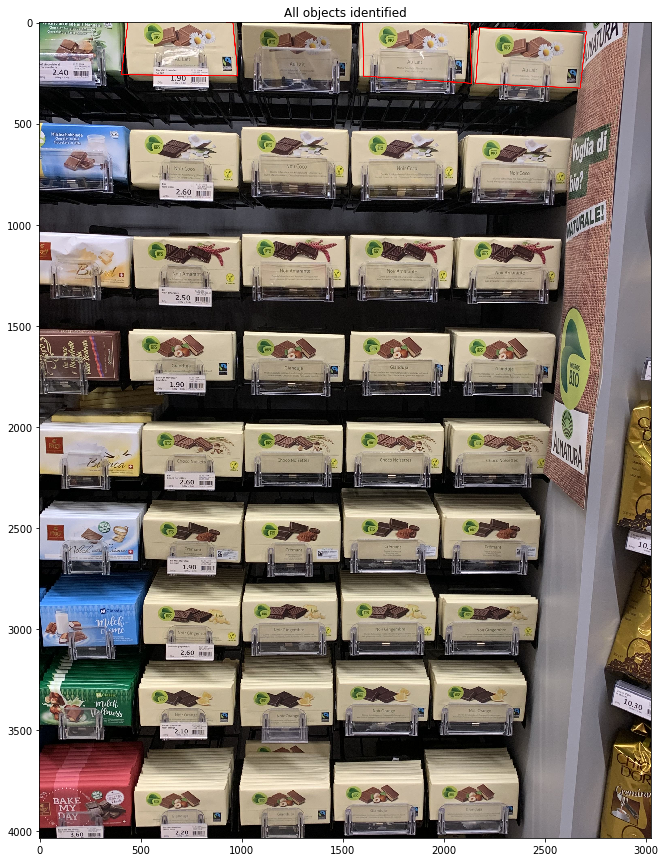

In [319]:
draw_bounding_boxes(img_target, img_template, new_test_model_kaze, 1, True, color=(3, 3, 252))

### SURF

In [30]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [31]:
keypoints_target_surf, descriptors_target_surf, keypoints_template1_surf, descriptors_template1_surf = surf_keypoints_and_descriptors(img_target, img_template)

In [32]:
plot_best_matches1_surf, best_matches1_surf = get_best_matches(descriptors_target_surf, descriptors_template1_surf, ratio=0.45)

In [33]:
correspondences1_surf = get_correspondences(best_matches1_surf, keypoints_target_surf, keypoints_template1_surf)

In [34]:
len(correspondences1_surf)

193

In [36]:
models1_surf = sequential_msac(correspondences1_surf, 1, 4,99,2500, 3)

180
165
151
143


In [37]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

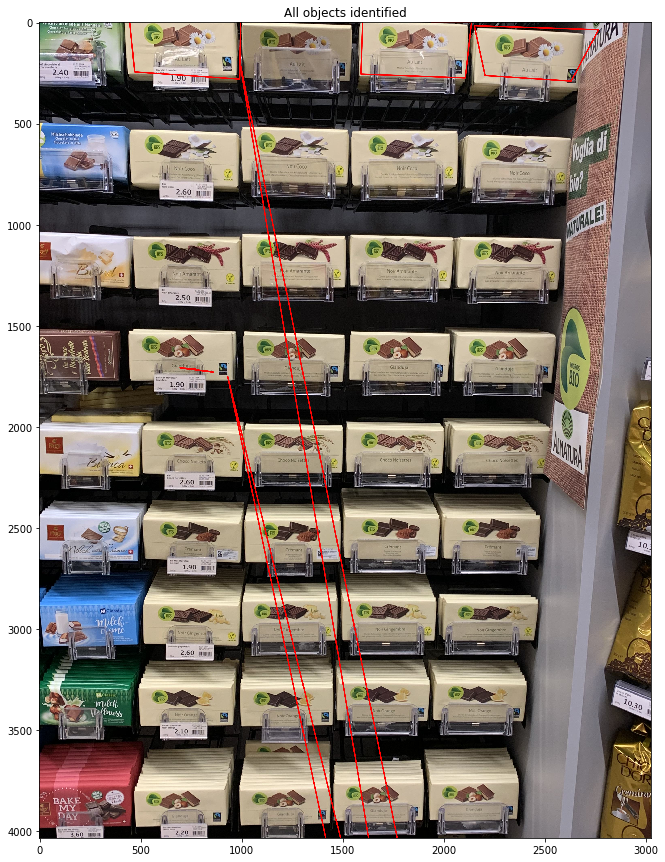

In [38]:
draw_bounding_boxes(img_target, img_template, models1_surf, 1, False, color=(3, 3, 252))

In [39]:
PS_surf1 = get_preference_sets(correspondences1_surf, models1_surf)

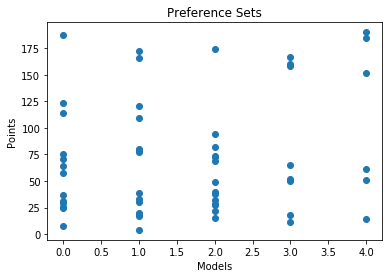

In [40]:
plot_scatter(PS_surf1)

In [41]:
cl_surf1 = j_linkage(PS_surf1)

In [42]:
mod_surf1 = remove_pref_set(cl_surf1)
mod_surf1 = get_model(cl_surf1,correspondences1_surf)
new_mod_surf1 = delete_small_model(mod_surf1, 4)

In [43]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

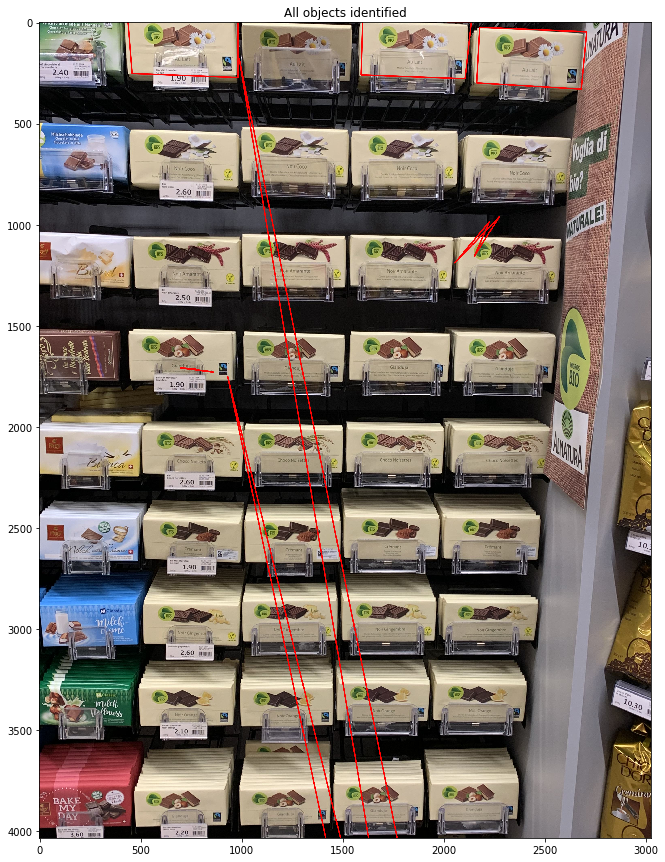

In [44]:
draw_bounding_boxes(img_target, img_template, new_mod_surf1, 1, True, color=(3, 3, 252))

In [45]:
clusters_surf1, clusters_size_list_surf1 = define_clusters(new_mod_surf1)
clusters_size_surf1 = len(clusters_surf1)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list_surf1, clusters_surf1)))

new_test_model_surf1 = remove_far_distances_clusters(clusters_surf1, new_mod_surf1,100)

print("Num of clusters previously: {}".format(len(new_mod_surf1)))

clusters_new_surf1, clusters_size_list_new_surf1 = define_clusters(new_test_model_surf1)
clusters_new_surf1, new_test_model_surf1 = merge_cluster(clusters_new_surf1, new_test_model_surf1)
clusters_new_surf1, clusters_size_list_new_surf1 = define_clusters(new_test_model_surf1)

print("Num of clusters currently: {}".format(len(new_test_model_surf1)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new_surf1, clusters_new_surf1)))

Previous dunn index of the cluster : 0.0013471717825047807
Num of clusters previously: 6
Num of clusters currently: 3
Current dunn index of the cluster : 0.05012173917053547


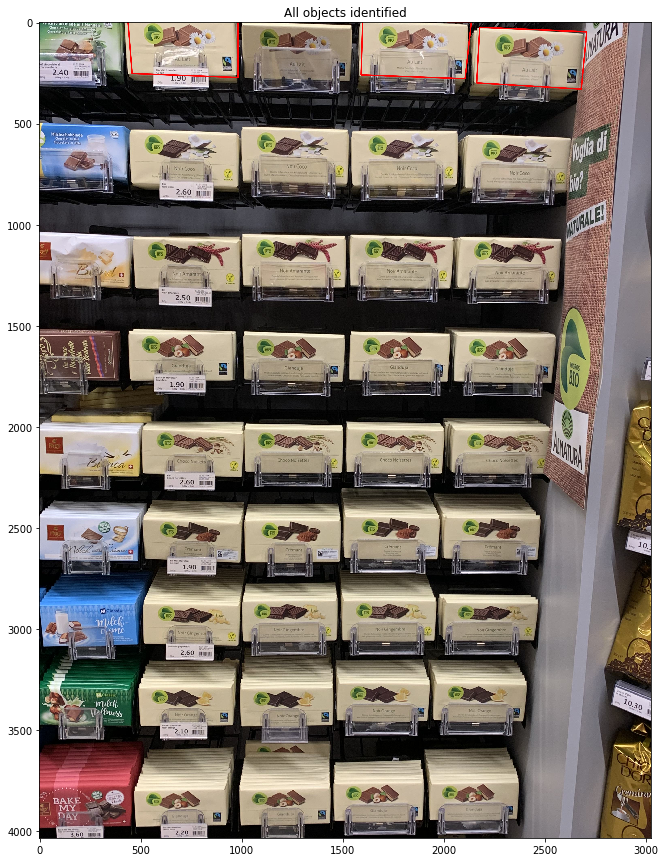

In [46]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])
draw_bounding_boxes(img_target, img_template, new_test_model_surf1, 1, True, color=(3, 3, 252))